In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## About the dataset

The dataset file contains water quality metrics for 3276 different water bodies.

1.**pH value**:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2.**Hardness**:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium

3.**Solids (Total dissolved solids - TDS)**:
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4.**Chloramines**:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5.**Sulfate**:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6.**Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7.**Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8.**Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9.**Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10.**Potability**:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset and understanding the data

In [3]:
df = pd.read_csv('E:\JAL-Water-quality-processing-website--main(1)\sample_project1/water_potability.csv')

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [6]:
df.shape

(3276, 10)

**There are 3276 rows and 10 columns in the dataset.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
#unique values of potability (whether it is usable or not) and their counts
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [9]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [10]:
# checking for null values
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

**So there are null values in the ph, Sulphate and Trihalomethanes.**

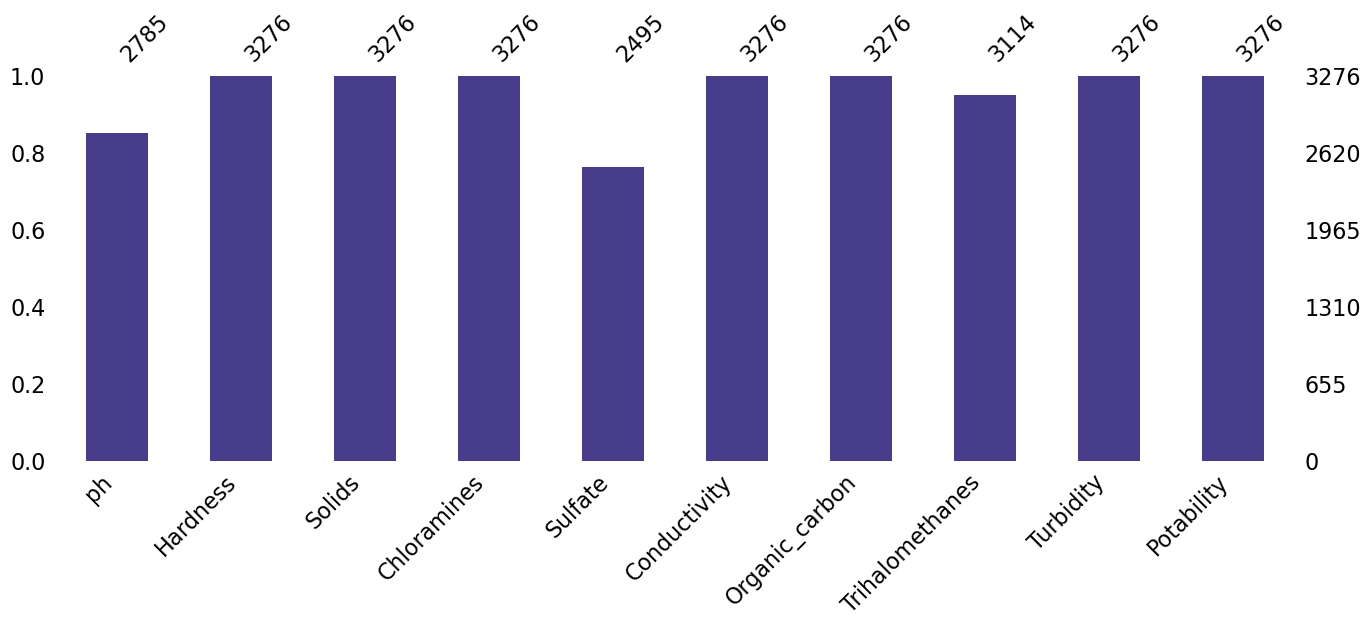

In [11]:
#plotting to find the missing values
msno.bar(df, figsize = (16,5), color = "#483D8B")
plt.show()

In [12]:
#Correlation of other features with potability
correlation = df.corr()
print(correlation['Potability'].sort_values(ascending = False))

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64


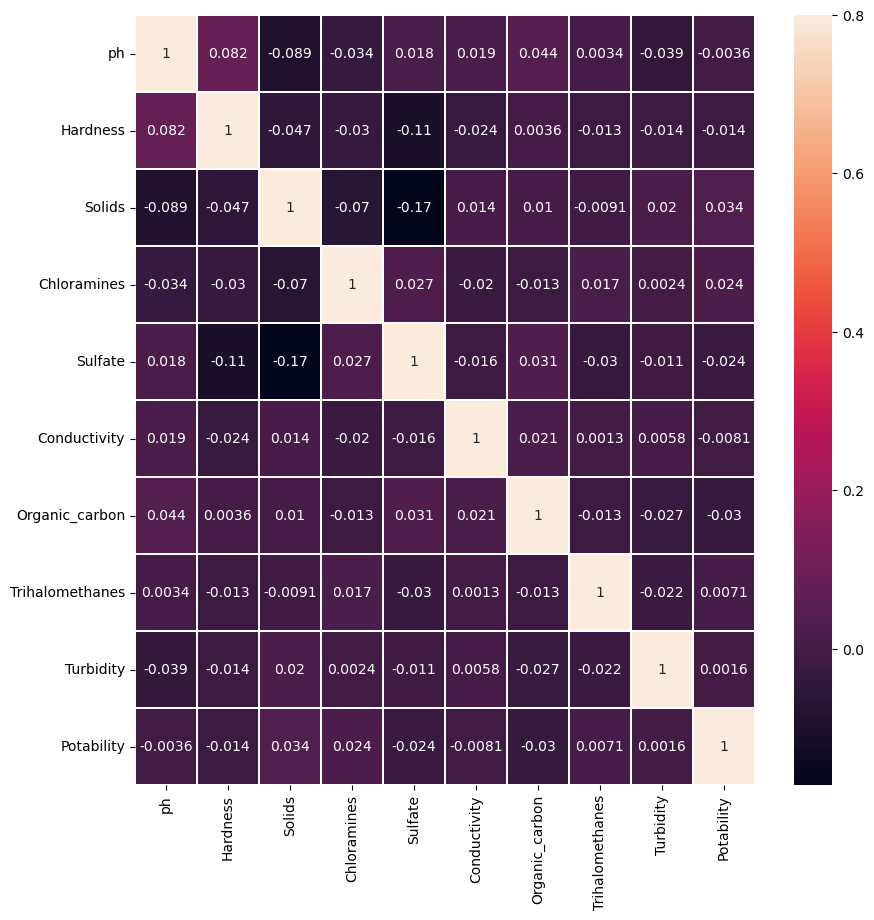

In [13]:
#Correlation plot
plt.figure(figsize = (10,10))
sns.heatmap(correlation,vmax=.8,linewidths=0.01, annot = True)
plt.show()

## Visualizations

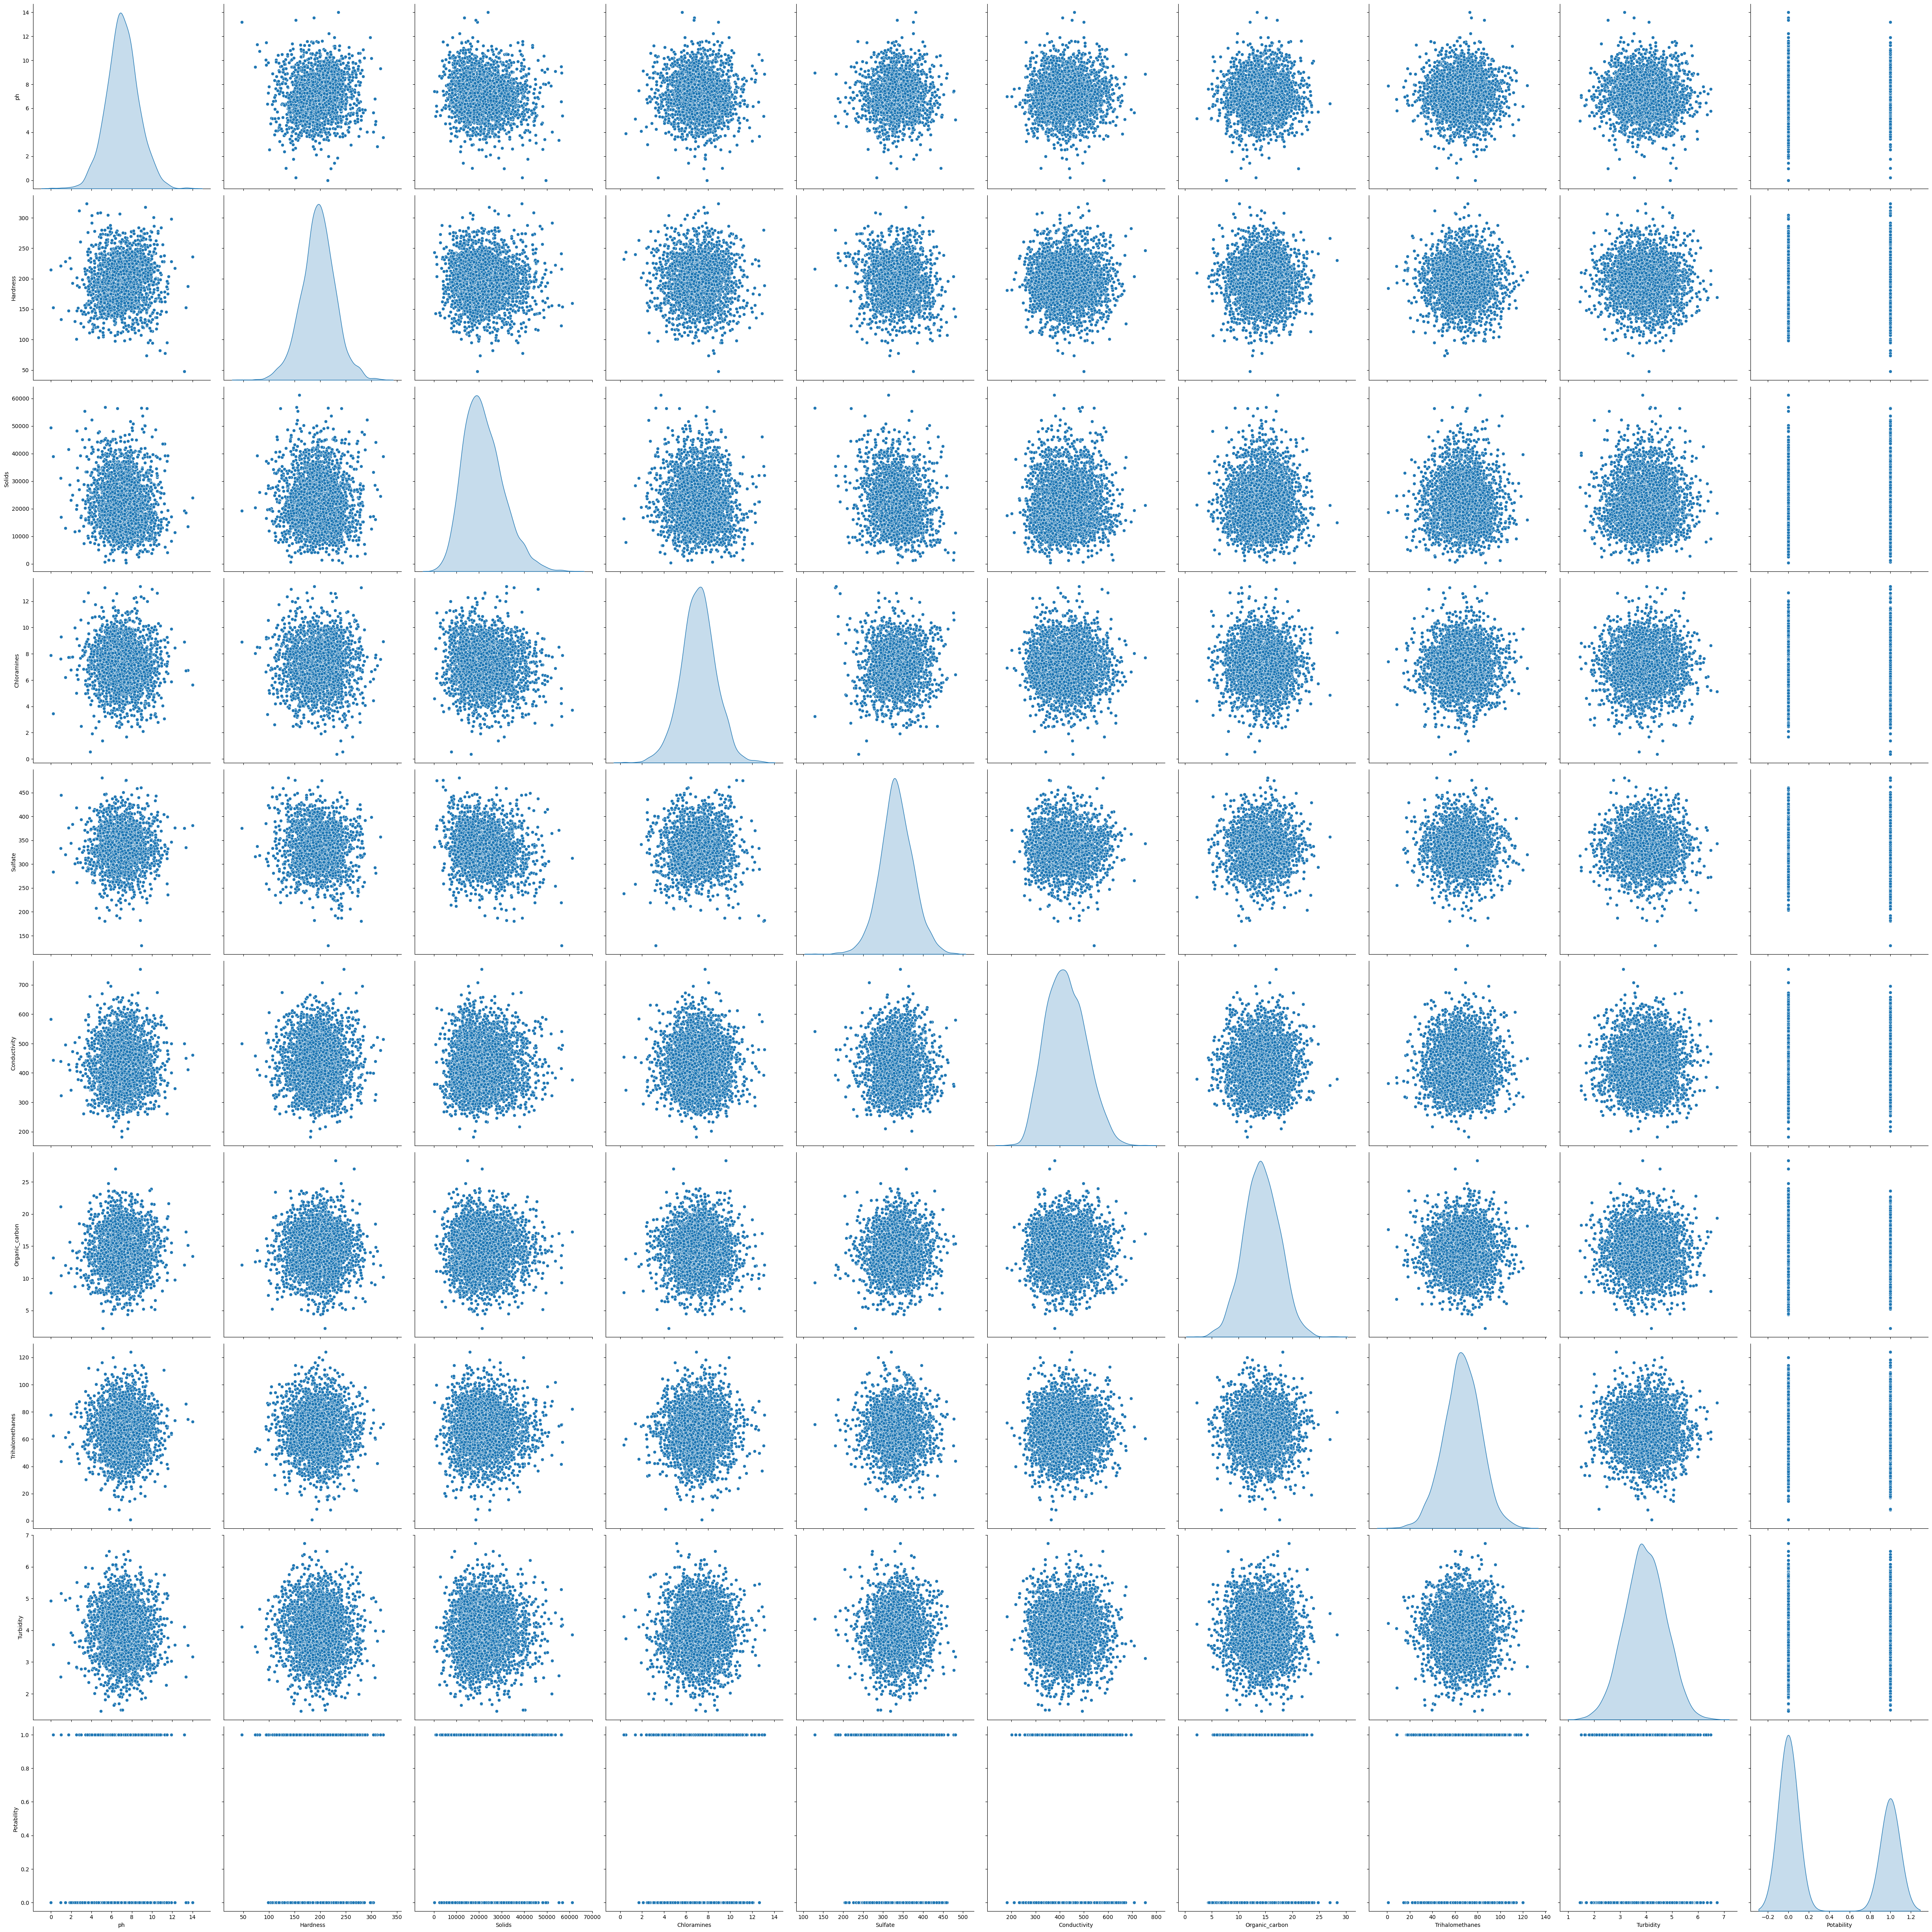

In [14]:
sns.pairplot(df, height = 5, kind = "scatter", diag_kind = "kde")

It is clear that we have an imbalance of classes and there is no clear division into clusters.

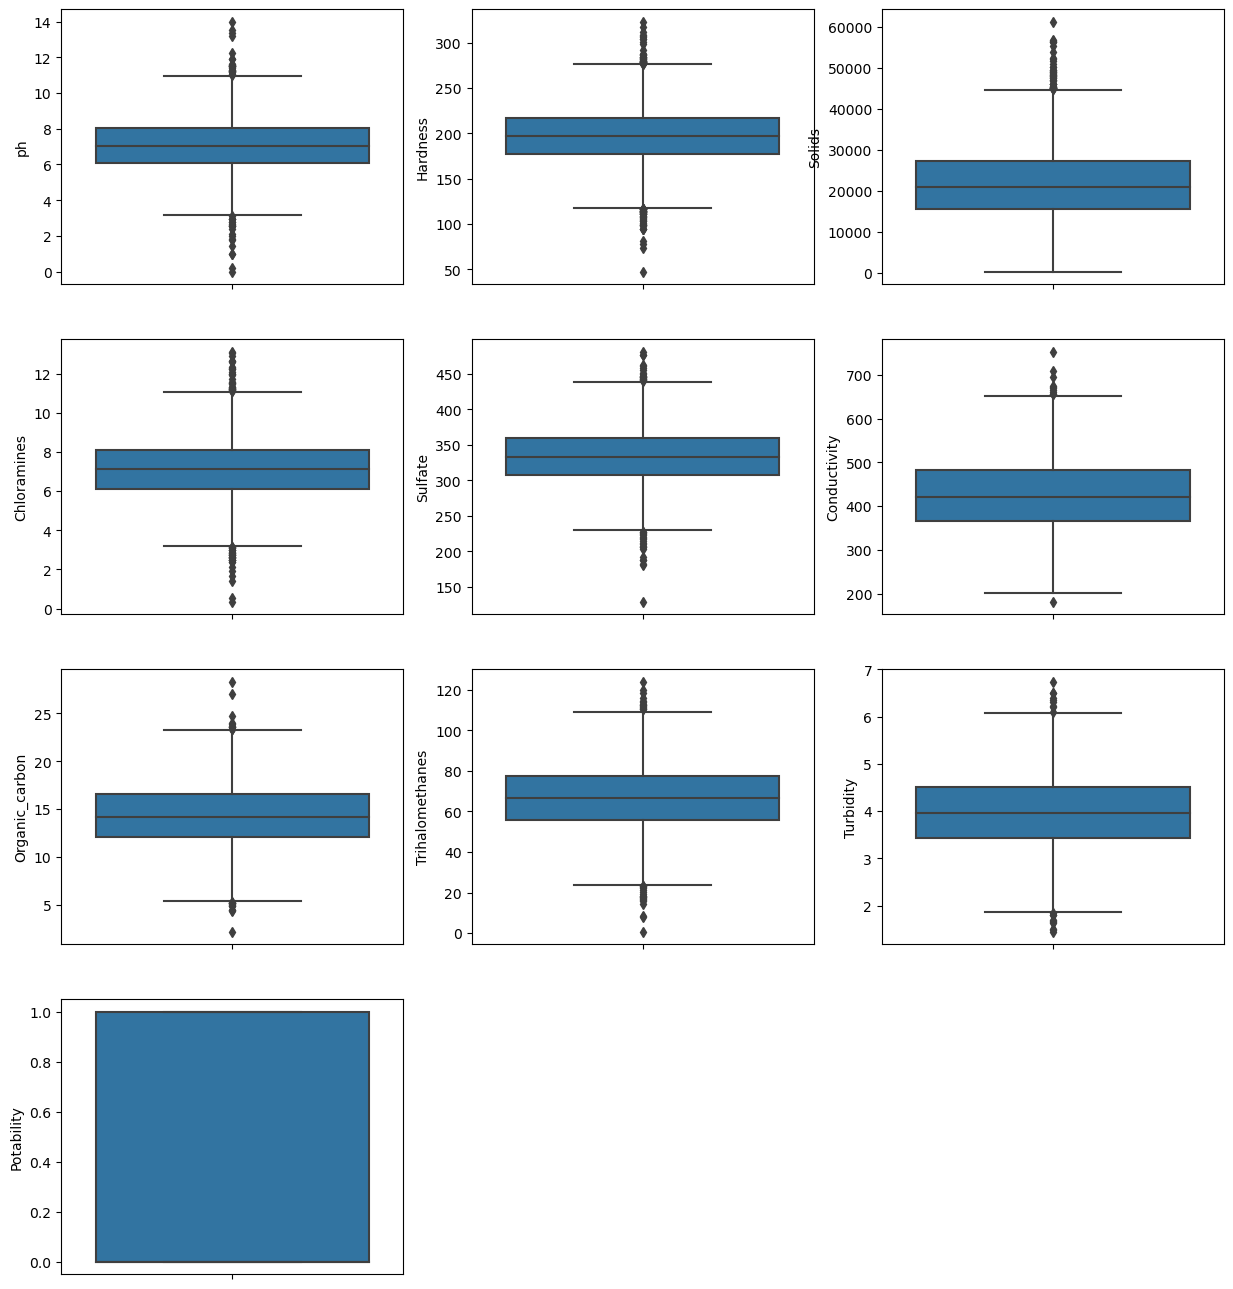

In [15]:
#Boxplots
i = 1
plt.figure(figsize = (15,25))
for features in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y = df[features])
    i+=1

There are some outliers in the data.

## Dealing with null values

In [16]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer

In [18]:
impute =  KNNImputer(n_neighbors = 10, weights = "uniform")

In [19]:
imputed = impute.fit_transform(df)

In [20]:
dfnew = pd.DataFrame(imputed,columns = df.columns)
dfnew.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.417308  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  341.794864    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  329.237272    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

In [21]:
#Checking for null values again
dfnew.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**The null values are removed. The gaps are filled with k-nearest neighbors method.**

## Handling Outliers

In [22]:
from sklearn.neighbors import LocalOutlierFactor

In [23]:
c = LocalOutlierFactor(n_neighbors = 5, contamination = 'auto')
y_pred = c.fit_predict(dfnew)

In [24]:
dfnew['Out'] = y_pred

In [25]:
Out = df[dfnew['Out']!=1]

In [26]:
Out.shape

(54, 10)

In [27]:
dfnew.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   7.417308  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246  341.794864    592.885359   
2   8.099124  224.236259  19909.541732     9.275884  329.237272    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8   7.612324  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  Out  
0       10.379783        86.990970   2.963135         0.0    1  
1       15.180013        56.329076   4.500656         0.0    1  
2       16.868637        66.420093   3.055934         0.0    1  
3       18.436524       100.341674   4.628771         0.0    1  
4       11.558279        31.997993   4.075075         0.0    1  
5        8.399735        54.917862   2.559708         0.0    1  
6       13.789695        84.603556   2.672989         0.0    1  
7       12.363817        62.798309   4.401425         0.0    1  
8       12.706049        53.928846   3.595017         0.0   -1  
9       17.927806        71.976601   4.370562         0.0    1

In [28]:
dfnew1 = dfnew[dfnew['Out']==1]

In [29]:
dfnew1.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  \
0    7.417308  204.890455  20791.318981     7.300212  368.516441   
1    3.716080  129.422921  18630.057858     6.635246  341.794864   
2    8.099124  224.236259  19909.541732     9.275884  329.237272   
3    8.316766  214.373394  22018.417441     8.059332  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.544869  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   

    Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  Out  
0     564.308654       10.379783        86.990970   2.963135         0.0    1  
1     592.885359       15.180013        56.329076   4.500656         0.0    1  
2     418.606213       16.868637        66.420093   3.055934         0.0    1  
3     363.266516       18.436524       100.341674   4.628771         0.0    1  
4     398.410813       11.558279        31.997993   4.075075         0.0    1  
5     280.467916        8.399735        54.917862   2.559708         0.0    1  
6     283.651634       13.789695        84.603556   2.672989         0.0    1  
7     474.607645       12.363817        62.798309   4.401425         0.0    1  
9     563.885481       17.927806        71.976601   4.370562         0.0    1  
10    425.383419       15.586810        78.740016   3.662292         0.0    1

In [30]:
dfnew1 = dfnew1.drop('Out',axis = 1)
dfnew1.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.417308  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  341.794864    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  329.237272    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

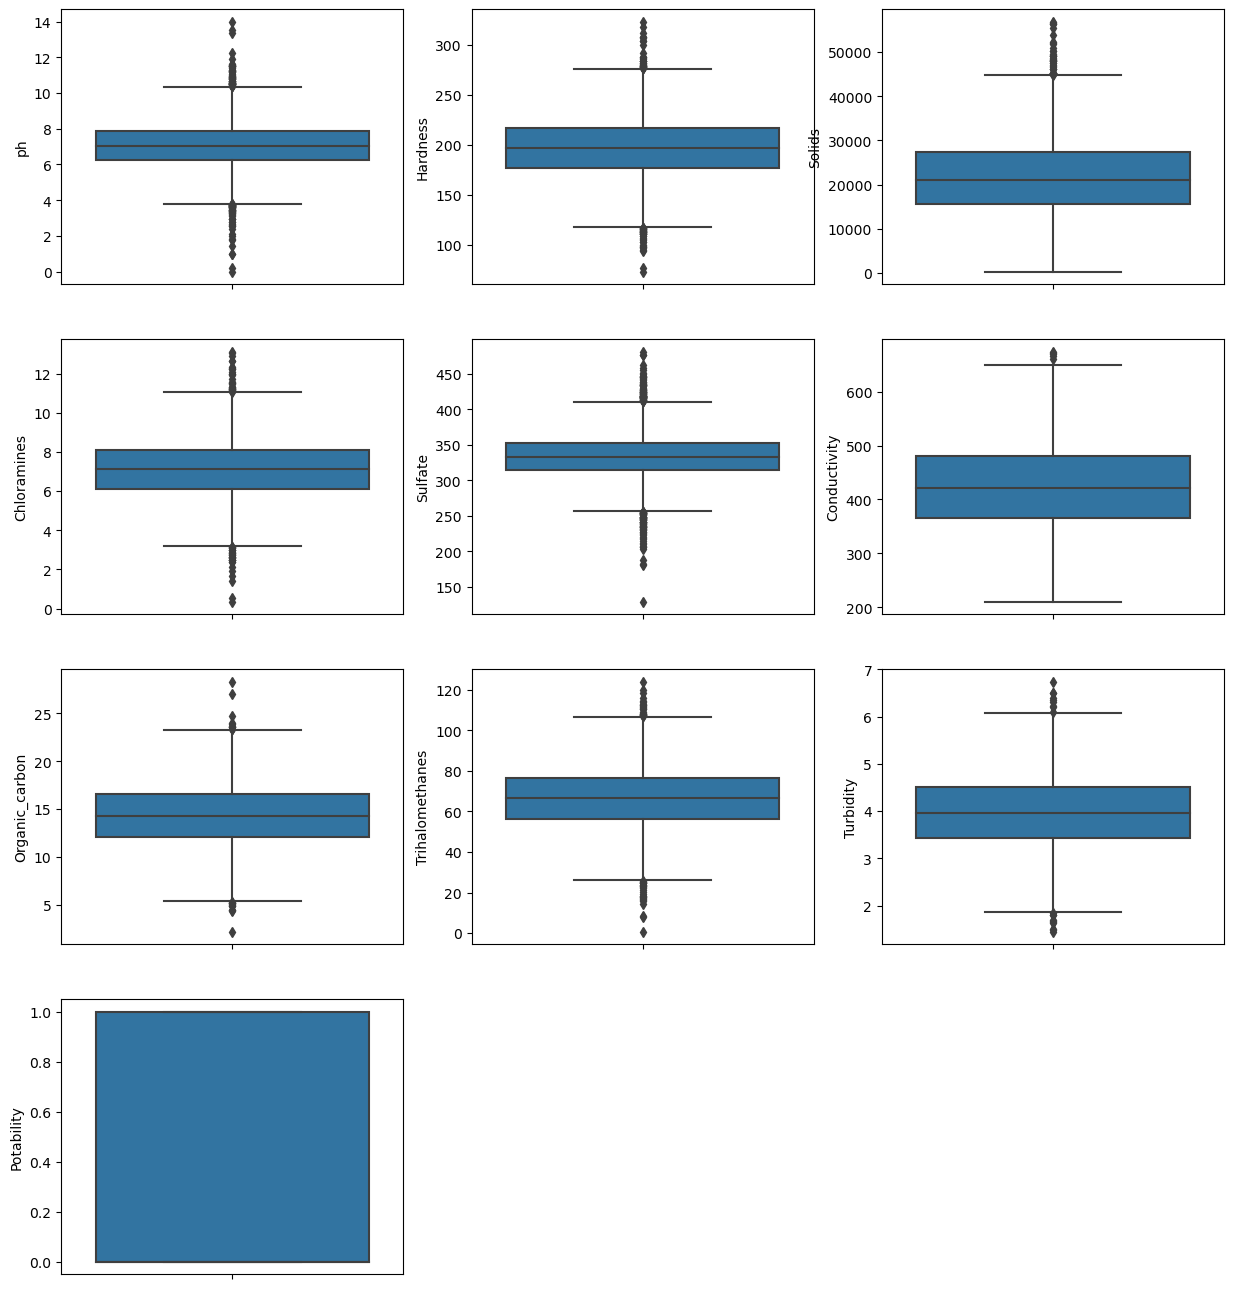

In [31]:
#Plotting boxplots again
i = 1
plt.figure(figsize = (15,25))
for features in dfnew1.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y = dfnew1[features])
    i+=1

<AxesSubplot:xlabel='Potability', ylabel='count'>

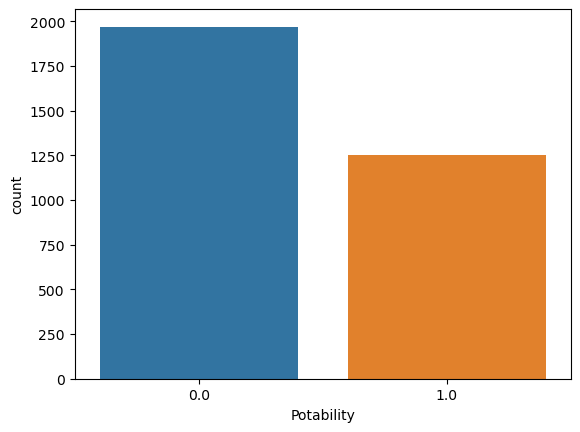

In [32]:
#Distribution of target variable
sns.countplot(dfnew1.Potability)

**There is a class imbalance. So we have to remove this effect.**

### Handling class imbalance

In [33]:
from imblearn.over_sampling import SMOTE 

In [34]:
oversample = SMOTE()
features, labels = oversample.fit_resample(dfnew1.drop(['Potability'],axis = 1),dfnew1['Potability'])

In [35]:
from collections import Counter
c = Counter(dfnew1['Potability'])
print(c)

Counter({0.0: 1969, 1.0: 1253})


**We get the new distribution of the target variable**

### Scaling

In [36]:
scaler = MinMaxScaler()
names = features.columns

d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.529808  0.526368  0.362007     0.543891  0.680385      0.762704   
1  0.265434  0.224053  0.323786     0.491839  0.604478      0.824275   
2  0.578509  0.603866  0.346413     0.698543  0.568806      0.448774   
3  0.594055  0.564356  0.383707     0.603314  0.647347      0.329540   
4  0.649445  0.431072  0.312272     0.484900  0.514545      0.405261   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327

### Modeling

In [37]:
#train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [38]:
models = [LogisticRegression(), RandomForestClassifier()]

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30)
    print(f"The accuracy of the {str(m)} model is",  accuracy_score(y_test, y_pred))
    print('*'*30, '\n')

model: LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.49      0.58      0.53       636
         1.0       0.51      0.41      0.45       664

    accuracy                           0.49      1300
   macro avg       0.50      0.50      0.49      1300
weighted avg       0.50      0.49      0.49      1300

------------------------------
The accuracy of the LogisticRegression() model is 0.4938461538461538
****************************** 

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       636
         1.0       0.73      0.69      0.71       664

    accuracy                           0.71      1300
   macro avg       0.71      0.71      0.71      1300
weighted avg       0.71      0.71      0.71      1300

------------------------------
The accuracy of the RandomForestClassifier() model is 0.7115384615384616
****************************** 



### Hyperparameter Tuning

In [39]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [40]:
def objective(trial: Trial,X,y) -> float:
    
    param = {
            'n_estimators' : trial.suggest_int("n_estimators",100,1500),
            'max_features' : trial.suggest_categorical("max_features",["auto","sqrt"]),
            'max_depth' : trial.suggest_int("max_depth",5,80,log = True),
            'min_samples_split' : trial.suggest_int("min_samples_split",2,15),
            'min_samples_leaf' : trial.suggest_int("min_samples_leaf",1,9),
            'bootstrap' : trial.suggest_categorical("bootstrap",[True,False])
            }
    
    model = RandomForestClassifier(**param)
    
    return cross_val_score(model, X, y, cv=5).mean()

In [41]:
# n_trials can be varied with accuracy...

In [42]:
study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X_train,y_train),n_trials= 5)

[I 2022-12-09 15:14:44,297] A new study created in memory with name: no-name-75237628-3a28-4687-95c3-1cd754b6f797
[I 2022-12-09 15:15:49,706] Trial 0 finished with value: 0.6618538324420677 and parameters: {'n_estimators': 1464, 'max_features': 'sqrt', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 0 with value: 0.6618538324420677.
[I 2022-12-09 15:16:06,404] Trial 1 finished with value: 0.6618516761543326 and parameters: {'n_estimators': 392, 'max_features': 'sqrt', 'max_depth': 33, 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.6618538324420677.
[I 2022-12-09 15:16:44,436] Trial 2 finished with value: 0.6550320568109942 and parameters: {'n_estimators': 1275, 'max_features': 'sqrt', 'max_depth': 54, 'min_samples_split': 13, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.6618538324420677.
[I 2022-12-09 15:17:00,692] Trial 3 finished with value: 0.608024984187

In [43]:
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

Best trial: score 0.6618538324420677,
params {'n_estimators': 1464, 'max_features': 'sqrt', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 5, 'bootstrap': False}


In [44]:
clf=RandomForestClassifier()
parametres={'n_estimators': [445], 'max_features': ['sqrt'], 'max_depth': [77], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [False]}
grid_search_cv_clf=GridSearchCV(clf,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf2=grid_search_cv_clf.best_estimator_
y_pred2=best_clf2.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))
print("*"*30)
print("The accuracy of the model is", accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71       636
         1.0       0.72      0.69      0.71       664

    accuracy                           0.71      1300
   macro avg       0.71      0.71      0.71      1300
weighted avg       0.71      0.71      0.71      1300

******************************
The accuracy of the model is 0.7069230769230769


### Confusion matrix

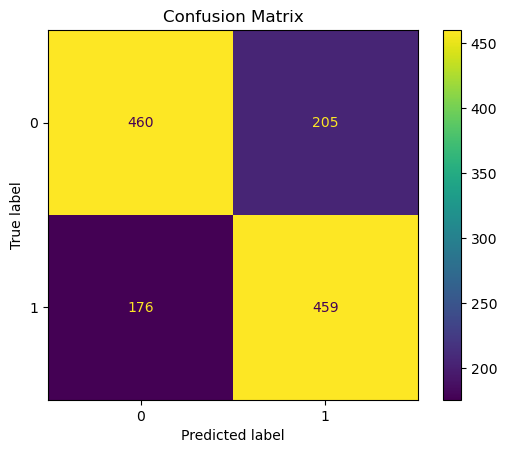

In [45]:
cm = confusion_matrix(best_clf2.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [46]:
# Conff

### Prediction System

In [47]:
csv = pd.read_csv('E:\JAL-Water-quality-processing-website--main(1)/file.csv')
csv.columns

Index(['pH_value', 'TDS', 'Sulfate', 'Organic_carbon', 'Turbidity', 'Hardness',
       'Chloramines', 'Conductivity', 'Trihalomethanes'],
      dtype='object')

In [48]:
csv

pH_value    TDS  Sulfate  Organic_carbon  Turbidity  Hardness  Chloramines  \
0         7  15666      307              12          3       176            6   

   Conductivity  Trihalomethanes  
0           365               55

In [49]:
# print("\t \tWATER QUALITY PREDICTION SYSTEM")
# print("*"*75)
# ph = float(input("Enter the ph value: "))
# hardness = float(input("Enter the value of hardness: "))
# solids = float(input("Enter the value of solids: "))
# chloramines = float(input("Enter the value of chloramines: "))
# sulphate = float(input("Enter the value of sulphate: "))
# conductivity = float(input("Enter the value of conductivity: "))
# organic = float(input("Enter the value of organic carbon: "))
# tri = float(input("Enter the value of trihalomethanes: "))
# turb = float(input("Enter the value of turbidity: "))
data = {'ph':csv.pH_value,
       'Hardness':csv.Hardness,
       'Solids':csv.TDS,
       'Chloramines':csv.Chloramines,
       'Sulfate':csv.Sulfate,
       'Conductivity':csv.Conductivity,
       'Organic_carbon':csv.Organic_carbon,
       'Trihalomethanes':csv.Trihalomethanes,
       'Turbidity':csv.Turbidity}
datadf = pd.DataFrame(columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
datadf = datadf.append(data, ignore_index = True)

s = scaler.transform(datadf)

y_prediction=best_clf2.predict(s)

In [52]:
if y_prediction[0]== 0:
    data = ['THE WATER IS NOT GOOD FOR CONSUMPTION']
    data = pd.DataFrame(data)
    print("\033[1m THE WATER IS NOT GOOD FOR CONSUMPTION\033[0m ")
else:
    data = ['THE WATER IS GOOD FOR CONSUMPTION']
    data = pd.DataFrame(data)
    print("\033[1m THE WATER IS GOOD FOR CONSUMPTION\033[0m")

 THE WATER IS GOOD FOR CONSUMPTION


In [53]:
data.to_csv('output.csv')